# 予備実験

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## 発話分類

In [2]:
%load_ext tensorboard
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
import datetime

## データセット

In [6]:
ls drive/'My Drive'/研究/swda_data/

full_set.txt  test/         train/         val/         予備実験.ipynb
metadata/     test_set.txt  train_set.txt  val_set.txt


In [85]:
train_dataset_path = "drive/My Drive/研究/swda_data/train_set.txt"
test_dataset_path = "drive/My Drive/研究/swda_data/test_set.txt"
val_dataset_path = "drive/My Drive/研究/swda_data/val_set.txt"
full_dataset_path = "drive/My Drive/研究/swda_data/full_set.txt"
vacab_list_path = "drive/My Drive/研究/swda_data/vocabulary.txt"

In [8]:
"""
train_dataset_path = "../Switchboard-Corpus/swda_data/train_set.txt"
test_dataset_path = "../Switchboard-Corpus/swda_data/test_set.txt"
val_dataset_path = "../Switchboard-Corpus/swda_data/val_set.txt"
"""

'\ntrain_dataset_path = "../Switchboard-Corpus/swda_data/train_set.txt"\ntest_dataset_path = "../Switchboard-Corpus/swda_data/test_set.txt"\nval_dataset_path = "../Switchboard-Corpus/swda_data/val_set.txt"\n'

In [41]:
train_dataset = []
f = open(train_dataset_path, "r", encoding='utf-8')
for row in f:
    train_dataset.append(row.strip())
f.close()

In [42]:
val_dataset = []
f = open(val_dataset_path, "r", encoding='utf-8')
for row in f:
    val_dataset.append(row.strip())
f.close()

In [43]:
test_dataset = []
f = open(test_dataset_path, "r", encoding='utf-8')
for row in f:
    test_dataset.append(row.strip())
f.close()

In [44]:
full_dataset = []
f = open(full_dataset_path, "r", encoding='utf-8')
for row in f:
    full_dataset.append(row.strip())
f.close()

In [89]:
vocab_list = []
f = open(vacab_list_path, "r", encoding='utf-8')
for row in f:
  vocab_list.append(row.split("\n")[0])
f.close()

In [91]:
len(vocab_list)

22301

### データセット分割

In [48]:
## 訓練データ
train_utter_user = []
train_utter = []
train_utter_label = []

## テストデータ
test_utter_user = []
test_utter = []
test_utter_label = []

## 検証データ
val_utter_user = []
val_utter = []
val_utter_label = []

## フルデータ
full_utter_user = []
full_utter = []
full_utter_label = []


In [49]:
for j in train_dataset:
    for i,v in enumerate(j.split("|")):
        if i == 0:
            train_utter_user.append(v)
        elif i==1:
            train_utter.append(v)
        else:
            train_utter_label.append(v)
            
print("finish")

finish


In [50]:
for j in test_dataset:
    for i,v in enumerate(j.split("|")):
        if i == 0:
            test_utter_user.append(v)
        elif i==1:
            test_utter.append(v)
        else:
            test_utter_label.append(v)
            
print("finish")

finish


In [51]:
for j in val_dataset:
    for i,v in enumerate(j.split("|")):
        if i == 0:
            val_utter_user.append(v)
        elif i==1:
            val_utter.append(v)
        else:
            val_utter_label.append(v)
            
print("finish")

finish


In [52]:
for j in full_dataset:
    for i,v in enumerate(j.split("|")):
        if i == 0:
            full_utter_user.append(v)
        elif i==1:
            full_utter.append(v)
        else:
            full_utter_label.append(v)
            
print("finish")

finish


### ラベルデータ数値化

In [53]:
from tensorflow.keras.utils import to_categorical

In [54]:
label_path = "drive/My Drive/研究/swda_data/metadata/labels.txt"
labels = []
f = open(label_path, "r", encoding='utf-8')
for row in f:
    labels.append(row.strip())
f.close()

In [55]:
label = {}
for i,v in enumerate(labels):
    label[v] = to_categorical(i, num_classes=len(labels))

In [56]:
train_utter_labels = []
for i in train_utter_label:
    train_utter_labels.append(label[i])

In [57]:
test_utter_labels = []
for i in test_utter_label:
    test_utter_labels.append(label[i])

In [58]:
val_utter_labels = []
for i in val_utter_label:
    val_utter_labels.append(label[i])

## データセットをtensorflowに扱える形にする

In [93]:
train_data = tf.data.Dataset.from_tensor_slices((train_utter, train_utter_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_utter, test_utter_labels))
val_data = tf.data.Dataset.from_tensor_slices((val_utter, val_utter_labels))
full_data = tf.data.Dataset.from_tensor_slices((full_utter))
vocab_data = tf.data.Dataset.from_tensor_slices((vocab_list))

In [60]:
for i,v in train_data.take(10):
    print(i,v)

tf.Tensor(b'Okay.', shape=(), dtype=string) tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(41,), dtype=float32)
tf.Tensor(b'So, What kind of experience do you, do you have, then with child care?', shape=(), dtype=string) tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(41,), dtype=float32)
tf.Tensor(b'I guess, I think, uh, I wonder if that worked.', shape=(), dtype=string) tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(41,), dtype=float32)
tf.Tensor(b'Does it say something?', shape=(), dtype=string) tf.Tensor(
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(41,), dtype=float32)
tf.Tensor(b'I think it usually does.'

In [61]:
i,v = next(iter(train_data))
print(i,v)

tf.Tensor(b'Okay.', shape=(), dtype=string) tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(41,), dtype=float32)


## トークナイザー

In [94]:
## ボキャブラリーリスト
vocabulary_set = set()
## トークナイザー
tokenizer = tfds.features.text.Tokenizer()

full_data_list = [train_data, test_data, val_data]
## 分かち書き
for j in vocab_data:
    some_tokens = tokenizer.tokenize(j.numpy())
    vocabulary_set.update(some_tokens)
    
## ボキャブラリーリスト作成
vocab_size = len(vocabulary_set)

In [95]:
vocab_size

22221

## encode生成

In [96]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [97]:
def encode(token, label):
    token = encoder.encode(token.numpy())
    return token, label

@tf.function
def tf_encoder(utter, label):
    encoded_text, label = tf.py_function(encode,[utter, label],[tf.int64, tf.float32])
    #encoded_text.set_shape([None])
    #label.set_shape([])
    return encoded_text, label

## テストデータ

In [33]:
def test_encode(token):
    token = encoder.encode(token.numpy())
    return token

@tf.function
def test_tf_encoder(utter):
    encoded_text = tf.py_function(encode,[utter],[tf.int64])
    #encoded_text.set_shape([None])
    
    return encoded_text


## metrics

In [66]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'),
      tf.keras.metrics.Accuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

## データ設計

In [98]:
max_len = 40

In [99]:
all_train_data_encode = train_data.map(tf_encoder)
all_test_data_encode = test_data.map(tf_encoder)
all_val_data_encode = val_data.map(tf_encoder)

In [100]:
utter_train_data = all_train_data_encode.padded_batch(64, padded_shapes=([None], [41]), drop_remainder=True)
utter_test_data = all_test_data_encode.padded_batch(64, padded_shapes=([None], [41]), drop_remainder=True)
utter_val_data = all_val_data_encode.padded_batch(64, padded_shapes=([None], [41]), drop_remainder=True)

In [101]:
utter_train_data, utter_test_data, utter_val_data

(<PaddedBatchDataset shapes: ((64, None), (64, 41)), types: (tf.int64, tf.float32)>,
 <PaddedBatchDataset shapes: ((64, None), (64, 41)), types: (tf.int64, tf.float32)>,
 <PaddedBatchDataset shapes: ((64, None), (64, 41)), types: (tf.int64, tf.float32)>)

In [102]:
i = next(iter(utter_train_data.take(1)))

## モデル設計(RNN)

In [72]:
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop

In [73]:
rnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(41, activation='softmax')
])

In [74]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1423680   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 41)                2665      
Total params: 1,463,529
Trainable params: 1,463,529
Non-trainable params: 0
_________________________________________________________________


In [75]:
rnn_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=METRICS)

In [76]:
history = rnn_model.fit(utter_train_data, epochs=10,
                    validation_data=utter_val_data,
                    validation_steps=30)

Epoch 1/10
3006/3006 [==============================] - 194s 65ms/step - loss: 1.3594 - tp: 91005.0000 - fp: 31788.0000 - tn: 7663572.0000 - fn: 101379.0000 - accuracy: 0.0000e+00 - precision: 0.7411 - recall: 0.4730 - auc: 0.9610 - val_loss: 1.0296 - val_tp: 1183.0000 - val_fp: 358.0000 - val_tn: 76442.0000 - val_fn: 737.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.7677 - val_recall: 0.6161 - val_auc: 0.9710
Epoch 2/10
3006/3006 [==============================] - 192s 64ms/step - loss: 1.0604 - tp: 116423.0000 - fp: 31869.0000 - tn: 7663491.0000 - fn: 75961.0000 - accuracy: 0.0000e+00 - precision: 0.7851 - recall: 0.6052 - auc: 0.9732 - val_loss: 0.9348 - val_tp: 1293.0000 - val_fp: 356.0000 - val_tn: 76444.0000 - val_fn: 627.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.7841 - val_recall: 0.6734 - val_auc: 0.9783
Epoch 3/10
3006/3006 [==============================] - 196s 65ms/step - loss: 0.9810 - tp: 123062.0000 - fp: 31483.0000 - tn: 7663877.0000 - fn: 69322.0000 - acc

## 可視化

In [104]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

## TensorBoard 可視化

In [28]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### acc

In [29]:
plot_graphs(history, 'accuracy')

NameError: ignored

### loss

In [ ]:
plot_graphs(history, 'loss')

## モデル(LSTM)

In [77]:
BATCH_SIZE = 64

In [52]:
X = tf.keras.Input(shape=(None,), batch_size=BATCH_SIZE)
embedded = tf.keras.layers.Embedding(encoder.vocab_size, 128)(X)
lstm = tf.keras.layers.LSTM(128, dropout=0.4, recurrent_dropout=0.4)(embedded)
fully_connected = tf.keras.layers.Dense(units=256, activation='relu')(lstm)
Y = tf.keras.layers.Dense(41, activation='sigmoid',name='final_layer')(fully_connected)
Rnn_Model = tf.keras.Model(inputs=X, outputs=Y)

Rnn_Model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(1e-4),
                  metrics=['accuracy'])

In [53]:
Rnn_Model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(64, None)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (64, None, 128)           2797312   
_________________________________________________________________
lstm_3 (LSTM)                (64, 128)                 131584    
_________________________________________________________________
dense_6 (Dense)              (64, 256)                 33024     
_________________________________________________________________
final_layer (Dense)          (64, 41)                  10537     
Total params: 2,972,457
Trainable params: 2,972,457
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = Rnn_Model.fit(utter_train_data, epochs=5,
                    validation_data=utter_val_data, 
                    validation_steps=30)

Epoch 1/5
3006/3006 [==============================] - 563s 187ms/step - loss: 2.0370 - accuracy: 0.3768 - val_loss: 1.5296 - val_accuracy: 0.3766
Epoch 2/5
3006/3006 [==============================] - 588s 195ms/step - loss: 1.5979 - accuracy: 0.3893 - val_loss: 1.3659 - val_accuracy: 0.3844
Epoch 3/5
3006/3006 [==============================] - 621s 207ms/step - loss: 1.3662 - accuracy: 0.5878 - val_loss: 1.1593 - val_accuracy: 0.6495
Epoch 4/5
3006/3006 [==============================] - 603s 200ms/step - loss: 1.3024 - accuracy: 0.6210 - val_loss: 1.1217 - val_accuracy: 0.6682
Epoch 5/5
3006/3006 [==============================] - 592s 197ms/step - loss: 1.2525 - accuracy: 0.6321 - val_loss: 1.0827 - val_accuracy: 0.6651


In [55]:
plot_graphs(history, 'accuracy')

NameError: ignored

In [ ]:
plot_graphs(history, 'loss')

## モデル(双方向RNN)

In [47]:
X = tf.keras.Input(shape=(None,), batch_size=BATCH_SIZE)
embedded = tf.keras.layers.Embedding(encoder.vocab_size, 128)(X)
lstm = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(128, dropout=0.4, recurrent_dropout=0.4))(embedded)
fully_connected = tf.keras.layers.Dense(units=256, activation='relu')(lstm)
Y = tf.keras.layers.Dense(41, activation='sigmoid',
                          name='final_layer')(fully_connected)
Bidirectional_Rnn_Model = tf.keras.Model(inputs=X, outputs=Y)

Bidirectional_Rnn_Model.compile(loss='sparse_categorical_crossentropy',
                                optimizer=tf.keras.optimizers.Adam(1e-4),
                                metrics=['acc'])

In [48]:
Bidirectional_Rnn_Model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(64, None)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (64, None, 128)           2797312   
_________________________________________________________________
bidirectional_2 (Bidirection (64, 256)                 263168    
_________________________________________________________________
dense_12 (Dense)             (64, 256)                 65792     
_________________________________________________________________
final_layer (Dense)          (64, 41)                  10537     
Total params: 3,136,809
Trainable params: 3,136,809
Non-trainable params: 0
_________________________________________________________________


In [49]:
Bidirectional_RNN_history = Bidirectional_Rnn_Model.fit(utter_train_data, epochs=5,
                    validation_data=utter_val_data, 
                    validation_steps=30,
                   callbacks=[tensorboard_callback])

Epoch 1/5
3006/3006 [==============================] - 985s 328ms/step - loss: 1.6231 - acc: 0.5263 - val_loss: 1.1614 - val_acc: 0.6078
Epoch 2/5
3006/3006 [==============================] - 977s 325ms/step - loss: 1.2068 - acc: 0.6379 - val_loss: 0.9782 - val_acc: 0.6974
Epoch 3/5
3006/3006 [==============================] - 979s 326ms/step - loss: 1.0860 - acc: 0.6762 - val_loss: 0.9080 - val_acc: 0.7302
Epoch 4/5
3006/3006 [==============================] - 978s 325ms/step - loss: 1.0031 - acc: 0.6993 - val_loss: 0.8651 - val_acc: 0.7380
Epoch 5/5
3006/3006 [==============================] - 982s 327ms/step - loss: 0.9480 - acc: 0.7132 - val_loss: 0.8354 - val_acc: 0.7479


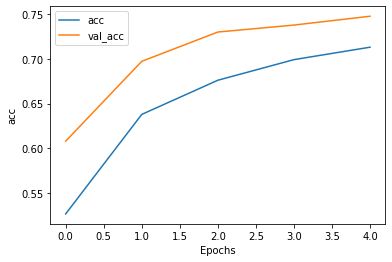

In [50]:
plot_graphs(Bidirectional_RNN_history, 'acc')

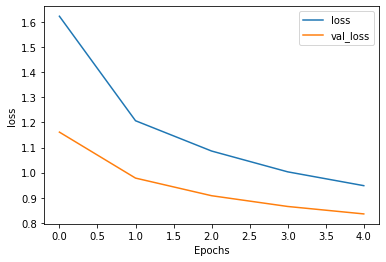

In [51]:
plot_graphs(Bidirectional_RNN_history, 'loss')

## モデル(Attention + 順方向RNN)

In [35]:
X = tf.keras.Input(shape=(None,), batch_size=BATCH_SIZE)
embedded = tf.keras.layers.Embedding(encoder.vocab_size, 64)(X)
lstm, forward_h, forward_c = tf.keras.layers.LSTM(128,
                                                return_sequences=True,
                                                return_state=True, 
                                                dropout=0.4, 
                                                recurrent_dropout=0.4)(embedded)
#state_h = tf.keras.layers.Concatenate()([forward_h, backward_h]) # 重みを結合
context,attention_weights = Attention(64)(lstm,forward_h) # ここにAttentionレイヤを挟む
fully_connected = tf.keras.layers.Dense(units=128, activation='relu')(context)
Y = tf.keras.layers.Dense(41, activation='sigmoid',name='final_layer')(fully_connected)

Attention_Model = tf.keras.Model(inputs=X, outputs=Y)

Attention_Model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['acc'])

In [36]:
Attention_Model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(64, None)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (64, None, 64)       1398656     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(64, None, 128), (N 98816       embedding_2[0][0]                
__________________________________________________________________________________________________
attention_1 (Attention)         ((64, 128), (64, Non 16577       lstm_2[0][0]                     
                                                                 lstm_2[0][1]          

In [37]:
Att_history = Attention_Model.fit(utter_train_data, epochs=5,
                    validation_data=utter_val_data, 
                    validation_steps=30,
                   callbacks=[tensorboard_callback])

Epoch 1/5
   1/3006 [..............................] - ETA: 0s - loss: 3.7124 - acc: 0.0469WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
3006/3006 [==============================] - 473s 157ms/step - loss: 1.9975 - acc: 0.3910 - val_loss: 1.3591 - val_acc: 0.5458
Epoch 2/5
3006/3006 [==============================] - 467s 155ms/step - loss: 1.3957 - acc: 0.5866 - val_loss: 1.1476 - val_acc: 0.5964
Epoch 3/5
3006/3006 [==============================] - 466s 155ms/step - loss: 1.2616 - acc: 0.6131 - val_loss: 1.0837 - val_acc: 0.6365
Epoch 4/5
3006/3006 [==============================] - 466s 155ms/step - loss: 1.2015 - acc: 0.6332 - val_loss: 1.0458 - val_acc: 0.6693
Epoch 5/5
3006/3006 [==============================] - 463s 154ms/step - loss: 1.1649 - acc: 

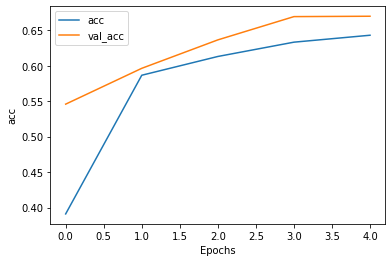

In [38]:
plot_graphs(Att_history, 'acc')

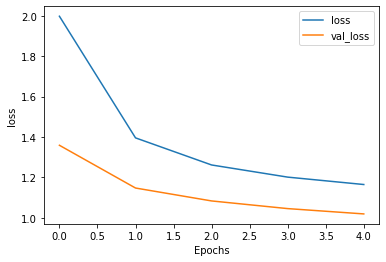

In [39]:
plot_graphs(Att_history, 'loss')

## モデル(Attention + 双方向RNN)

In [33]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [42]:
X = tf.keras.Input(shape=(None,), batch_size=BATCH_SIZE)
embedded = tf.keras.layers.Embedding(encoder.vocab_size, 64)(X)
lstm, forward_h, forward_c, backward_h, backward_c = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,return_state=True, dropout=0.4, recurrent_dropout=0.4))(embedded)
state_h = tf.keras.layers.Concatenate()([forward_h, backward_h]) # 重みを結合
context,attention_weights = Attention(64)(lstm,state_h) # ここにAttentionレイヤを挟む
fully_connected = tf.keras.layers.Dense(units=128, activation='relu')(context)
Y = tf.keras.layers.Dense(41, activation='sigmoid',name='final_layer')(fully_connected)

Bidirectional_Attention_Model = tf.keras.Model(inputs=X, outputs=Y)

Bidirectional_Attention_Model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['acc'])

In [43]:
Bidirectional_Attention_Model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(64, None)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (64, None, 64)       1398656     input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(64, None, 256), (N 197632      embedding_3[0][0]                
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 256)          0           bidirectional_1[0][1]            
                                                                 bidirectional_1[0][3] 

In [44]:
Bidirectional_Att_history = Bidirectional_Attention_Model.fit(utter_train_data, epochs=5,
                    validation_data=utter_val_data, 
                    validation_steps=30,
                   callbacks=[tensorboard_callback])

Epoch 1/5
3006/3006 [==============================] - 831s 276ms/step - loss: 1.8918 - acc: 0.4114 - val_loss: 1.3075 - val_acc: 0.5813
Epoch 2/5
3006/3006 [==============================] - 835s 278ms/step - loss: 1.4056 - acc: 0.5978 - val_loss: 1.2531 - val_acc: 0.5958
Epoch 3/5
3006/3006 [==============================] - 841s 280ms/step - loss: 1.3422 - acc: 0.6036 - val_loss: 1.1652 - val_acc: 0.5948
Epoch 4/5
3006/3006 [==============================] - 837s 278ms/step - loss: 1.2199 - acc: 0.6255 - val_loss: 1.0693 - val_acc: 0.6531
Epoch 5/5
3006/3006 [==============================] - 836s 278ms/step - loss: 1.1637 - acc: 0.6433 - val_loss: 1.0224 - val_acc: 0.6740


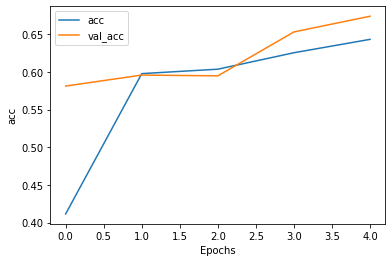

In [45]:
plot_graphs(Bidirectional_Att_history, 'acc')

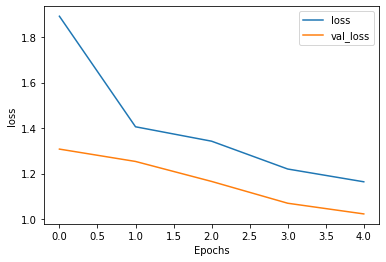

In [46]:
plot_graphs(Bidirectional_Att_history, 'loss')

In [78]:
pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.47.0-cp36-none-any.whl size=17289 sha256=cb210e66ae8fc4f5b693c81bcae5b615d74b9257498025946852c20cc63aa86f
  Stored in directory: /root/.cache/pip/wheels/70/87/01/76c703d5401b65e323927c1fdc665f3fb143282ff67d71e859
Successfully built keras-self-attention


In [79]:
from keras_self_attention import SeqSelfAttention

In [80]:
inp = tf.keras.Input(shape=(None,), batch_size=BATCH_SIZE)
emb = tf.keras.layers.Embedding(vocab_size, 64)(inp) # (?,128,32)
att_layer = SeqSelfAttention(name='attention')(emb)  # embbedingレイヤーの後にselfattentionを配置
out = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(att_layer)
output = tf.keras.layers.Dense(41, activation='softmax')(out)  # shape=(?, 2)
self_attention_modelv2 = tf.keras.Model(inp, output)
self_attention_modelv2.summary()
self_attention_modelv2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(64, None)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (64, None, 64)            1423552   
_________________________________________________________________
attention (SeqSelfAttention) (64, None, 64)            4161      
_________________________________________________________________
bidirectional (Bidirectional (64, 256)                 197632    
_________________________________________________________________
dense_2 (Dense)              (64, 41)                  10537     
Total params: 1,635,882
Trainable params: 1,635,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
self_attention_history = self_attention_modelv2.fit(utter_train_data, epochs=30,
                    validation_data=utter_val_data,
                    validation_steps=30)

Epoch 1/30
 154/3006 [>.............................] - ETA: 9:27 - loss: 0.8822 - tp: 6677.0000 - fp: 1793.0000 - tn: 392447.0000 - fn: 3179.0000 - accuracy: 0.0000e+00 - precision: 0.7883 - recall: 0.6775 - auc: 0.9799

## 注意単語の可視化

In [ ]:
attention_with_w_model = tf.keras.Model(inputs=Attention_Model.input, 
                               outputs=[Attention_Model.output, 
                                Attention_Model.get_layer('attention_7').output])

In [ ]:
def _softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y.tolist()

In [ ]:
def get_attention_weight(tokens, weights):
    weights = _softmax([np.sqrt((w ** 2).max()) for w in weights[-len(tokens):]])
    min_weight = np.min(weights)
    weights -= min_weight
    df = pd.DataFrame({
        'token': tokens,
        'pos': [t.pos_ for t in tokens],
        'weight': weights
    })

    df['rank'] = df['weight'].rank(ascending=False)
    df['weight'] = df['weight'].astype('float32')
    df = df.style.background_gradient(cmap='Blues', subset=['weight'])


In [ ]:
def get_label_and_weights(text, max_feature_len):
    tokens = tokenizer.tokenize(text.numpy())
    #vectors = [t.vector for t in tokens]
    #rint(vectors)
    for t in tokens:
        vectors = encoder.encode(t.numpy())
    
    #vectors = pad_sequences([vectors], maxlen=max_feature_len, dtype='float32')

    predicts = attention_with_w_model.predict(vectors)
    attention_df = get_attention_weight(tokens, predicts[1][0])

    return {
      'label': targets[predicts[0].argmax()],
      'prob': round(predicts[0].max() * 100, 2),
      'weights': attention_df
    }
    

In [ ]:
for text_tensor in test_data.take(5):
    res = get_label_and_weights(text_tensor, 50)
    

AttributeError: 'str' object has no attribute 'numpy'

In [ ]:
predicts = attention_with_w_model.predict(utter_test_data)

InvalidArgumentError: ConcatOp : Dimensions of inputs should match: shape[0] = [64,58,1] vs. shape[1] = [64,45,1] [Op:ConcatV2] name: concat

In [122]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

In [124]:
from keras.metrics import Recall

In [123]:
# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNISTデータを加工する
x_train  = x_train.reshape(60000, 784)
x_test   = x_test.reshape(10000, 784)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(y_train, 10)
y_test   = keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [125]:
# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=[Recall()])


In [133]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [126]:
epochs = 5
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5970 - recall_10: 0.7018 - val_loss: 0.3395 - val_recall_10: 0.8722
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3302 - recall_10: 0.8799 - val_loss: 0.2984 - val_recall_10: 0.8951
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3020 - recall_10: 0.8953 - val_loss: 0.2864 - val_recall_10: 0.9023
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2883 - recall_10: 0.9018 - val_loss: 0.2821 - val_recall_10: 0.9050
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2805 - recall_10: 0.9055 - val_loss: 0.2756 - val_recall_10: 0.9086
